## Menggunakan LLM (IBM Granite)

Klasifikasi risiko mental health (Low, Medium, High) berdasarkan gaya hidup seseorang.

Dataset: Impact of Screen Time on Mental Health

https://www.kaggle.com/datasets/khushikyad001/impact-of-screen-time-on-mental-health

In [1]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.9 MB/s eta 0:00:00


In [2]:
from langchain_community.llms import Replicate
from google.colab import userdata
import os

# Ambil token dari colab
api_token = userdata.get("api_token")

#masukin api token ke env.variable yg namanya replicate api token
os.environ["REPLICATE_API_TOKEN"] = api_token

In [3]:
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.7,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}


# Define LLM
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    input=parameters
)

In [4]:
#membuat model llm IBM Granite (DEFINE LLM)
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct"
)

In [5]:
#Install library gspread untuk baca Google Sheets
!pip install --upgrade -q gspread pandas gspread_dataframe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 71.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.


In [6]:
#Baca dataset dari google sheets
import pandas as pd

sheet_url = "https://docs.google.com/spreadsheets/d/1-qoMTam8XMwT58iKzHF56l0hr_QVo8RukXIwdIfAdPY/edit?usp=sharing"
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

In [7]:
#Load data jadi dataframe
df = pd.read_csv(csv_url)

In [8]:
df.head()

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


### Tahap 1: Exploratory Data Analysis (EDA)

Tujuannya adalah untuk  memahami struktur, isi, dan pola awal dataset sebelum melakukan analisis lebih lanjut, seperti klasifikasi atau visualisasi. Dalam case kali ini, EDA membantu mengenali hubungan antara gaya hidup digital (misalnya, screen time) dan kesehatan mental.

In [24]:
print(f"Jumlah baris: {len(df)}")
print(f"Jumlah kolom: {len(df.columns)}")
print(f"Ukuran dataset: {df.shape}")

Jumlah baris: 2000
Jumlah kolom: 27
Ukuran dataset: (2000, 27)


Proses di atas yaitu untuk memeriksa ukuran dataset penting untuk mengetahui skala data yang akan dianalisis, apakah cukup besar untuk analisis statistik atau terlalu besar sehingga perlu sampling untuk efisiensi memori. Informasi ini membantu menentukan langkah selanjutnya, seperti pembersihan data atau pengelompokan fitur.



In [25]:
print("\n KOLOM-KOLOM DATASET:")
print(df.columns)


 KOLOM-KOLOM DATASET:
Index(['user_id', 'age', 'gender', 'daily_screen_time_hours',
       'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours',
       'tv_usage_hours', 'social_media_hours', 'work_related_hours',
       'entertainment_hours', 'gaming_hours', 'sleep_duration_hours',
       'sleep_quality', 'mood_rating', 'stress_level',
       'physical_activity_hours_per_week', 'location_type',
       'mental_health_score', 'uses_wellness_apps', 'eats_healthy',
       'caffeine_intake_mg_per_day', 'weekly_anxiety_score',
       'weekly_depression_score', 'mindfulness_minutes_per_day',
       'mental_health_risk', 'ai_prediction'],
      dtype='object')


Fungsi di atas untuk menampilkan nama kolom membantu memahami variabel apa saja yang tersedia dalam dataset dan relevansinya dengan tujuan proyek (klasifikasi risiko kesehatan mental).



In [28]:
print("\n TIPE DATA:")
print(df.dtypes)


 TIPE DATA:
user_id                              object
age                                   int64
gender                               object
daily_screen_time_hours             float64
phone_usage_hours                   float64
laptop_usage_hours                  float64
tablet_usage_hours                  float64
tv_usage_hours                      float64
social_media_hours                  float64
work_related_hours                  float64
entertainment_hours                 float64
gaming_hours                        float64
sleep_duration_hours                float64
sleep_quality                         int64
mood_rating                           int64
stress_level                          int64
physical_activity_hours_per_week    float64
location_type                        object
mental_health_score                   int64
uses_wellness_apps                    int64
eats_healthy                          int64
caffeine_intake_mg_per_day          float64
weekly_anxiety_scor

Fungsi di atas untuk mengidentifikasi tipe data juga membantu mendeteksi potensi masalah, seperti kolom numerik yang tersimpan sebagai string, yang perlu diperbaiki pada tahap pembersihan data.



In [29]:
print("\nANALISIS STATISTIK DASAR:")
print(df.describe())


ANALISIS STATISTIK DASAR:
               age  daily_screen_time_hours  phone_usage_hours  \
count  2000.000000              2000.000000        2000.000000   
mean     38.805500                 6.025600           3.023700   
std      14.929203                 1.974123           1.449399   
min      13.000000                 0.000000           0.000000   
25%      26.000000                 4.700000           2.000000   
50%      39.000000                 6.000000           3.000000   
75%      51.000000                 7.325000           4.000000   
max      64.000000                13.300000           8.400000   

       laptop_usage_hours  tablet_usage_hours  tv_usage_hours  \
count         2000.000000         2000.000000     2000.000000   
mean             1.999950            0.995650        1.503700   
std              0.997949            0.492714        0.959003   
min              0.000000            0.000000        0.000000   
25%              1.300000            0.600000        

Fungsi describe() di atas pada pandas memberikan informasi statistik yang penting seperti 25%, 50%, dan 75% untuk membantu kita memahami distribusi data.

In [31]:
print("\nCEK MISSING VALUES:")
missing_values = df.isnull().sum()
missing_values


CEK MISSING VALUES:


,0
user_id,0
age,0
gender,0
daily_screen_time_hours,0
phone_usage_hours,0
laptop_usage_hours,0
tablet_usage_hours,0
tv_usage_hours,0
social_media_hours,0
work_related_hours,0


Fungsi di atas untuk menghitung jumlah nilai null (missing values) dalam setiap kolom dari DataFrame.

In [32]:
#Lihat distribusi target variable (mental_health_score)
print("\nDISTRIBUSI MENTAL HEALTH SCORE:")
print(f"Min: {df['mental_health_score'].min()}")
print(f"Max: {df['mental_health_score'].max()}")
print(f"Mean: {df['mental_health_score'].mean():.2f}")
print(f"Median: {df['mental_health_score'].median():.2f}")


DISTRIBUSI MENTAL HEALTH SCORE:
Min: 20
Max: 80
Mean: 49.65
Median: 49.00


Skor kesehatan mental dalam data ini berkisar dari 20 (terendah) hingga 80 (tertinggi), dengan rata-rata 49.65 dan nilai tengah 49.00. Artinya, kebanyakan orang punya skor sekitar 49-50, menunjukkan tingkat kesehatan mental yang seimbang dalam rentang ini, tanpa banyak nilai ekstrem.

In [33]:
#Lihat beberapa baris data
print("\nSAMPLE DATA (10 baris pertama):")
df.head(10)


SAMPLE DATA (10 baris pertama):


,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,mental_health_risk,ai_prediction
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,Urban,32,1,1,125.2,13,15,4.0,Medium,Medium
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,Suburban,75,0,1,150.4,19,18,6.5,Low,Medium
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,Suburban,22,0,0,187.9,7,3,6.9,High,Medium
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,Rural,22,0,1,73.6,7,2,4.8,High,Medium
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,Urban,64,1,1,217.5,8,10,0.0,Low,Unknown
5,user_6,20,Female,9.9,3.2,2.7,1.2,3.3,1.6,2.5,...,Suburban,72,1,0,102.8,17,16,11.5,Low,Medium
6,user_7,33,Male,5.8,4.0,3.2,1.9,1.3,0.9,1.7,...,Urban,45,0,0,162.8,6,4,7.9,Medium,High
7,user_8,51,Female,7.4,2.9,3.0,0.9,3.4,1.2,2.2,...,Urban,23,0,1,147.1,9,8,4.4,High,Medium
8,user_9,31,Female,6.0,2.3,2.9,1.4,0.4,1.5,2.1,...,Suburban,35,1,0,109.7,0,0,21.2,Medium,Medium
9,user_10,35,Male,6.8,6.4,2.1,1.4,0.5,1.2,2.2,...,Urban,47,1,0,206.8,3,8,8.1,Medium,Medium


Tujuan tahapan di atas menggunakan eksplorasi data sederhana (seperti df.head()) karena memberikan gambaran cepat tentang struktur dan isi data, membantu menentukan langkah analisis berikutnya.

### Tahap 2: Analisis menggunakan IBM Granite LLM

In [34]:
sample_data = df.head(50)  #Ambil dan pakai 50 baris pertama
print(f"Sample data: {len(sample_data)} baris")

Sample data: 50 baris


Tahapan di atas untuk mempermudah analisis awal dengan fokus pada subset data yang lebih kecil, sehingga lebih mudah dikelola dan dianalisis.

In [35]:
#Buat summary statistik singkat
summary_stats = sample_data[['daily_screen_time_hours', 'mental_health_score',
                           'sleep_duration_hours', 'physical_activity_hours_per_week',
                           'social_media_hours']].describe().round(2)

Langkah di atas adalah memilih variabel yang relevan dari dataset, yaitu *daily_screen_time_hours*, *mental_health_score*, *sleep_duration_hours*, *physical_activity_hours_per_week*, dan *social_media_hours*. Variabel-variabel ini dipilih karena memiliki potensi pengaruh terhadap kesehatan mental dan fisik untuk dijadikan fokus analisis.

In [36]:
print("\nSummary statistik yang akan dianalisis:")
print(summary_stats)


Summary statistik yang akan dianalisis:
       daily_screen_time_hours  mental_health_score  sleep_duration_hours  \
count                    50.00                50.00                 50.00   
mean                      6.68                50.18                  6.21   
std                       2.05                17.21                  1.29   
min                       0.20                21.00                  4.30   
25%                       5.50                35.25                  5.32   
50%                       6.70                51.00                  6.05   
75%                       8.02                64.00                  7.10   
max                      12.20                78.00                 10.00   

       physical_activity_hours_per_week  social_media_hours  
count                             50.00               50.00  
mean                               3.19                1.98  
std                                1.89                1.13  
min              

Tabel di atas ini menampilkan metrik seperti rata-rata, standar deviasi, dan kuartil untuk setiap variabel, yang memudahkan pemahaman tentang rentang dan variasi data.

MEMBUAT PROMPT MENGGUNAKAN LLM dengan memperhatikan 3 aspek:

1.   CLARITY
2.   CONTEXT
3.   EXAMPLES (Output yang diinginkan)


In [41]:
prompt = f"""
CONTEXT:
Analyze a dataset about the relationship between digital lifestyle (e.g., screen time)
and mental health to provide actionable insights and classify mental health risk levels.

DATA SAMPLE:
{sample_data[['age', 'daily_screen_time_hours', 'sleep_duration_hours', 'physical_activity_hours_per_week', 'mental_health_score']].to_string()}

TASK:
1. Find key patterns between lifestyle factors and mental health scores
2. Create 3 risk categories with mathematical thresholds
3. Give 3 actionable recommendations

OUTPUT FORMAT:
KEY INSIGHTS:
- Screen time impact: [1 sentence]
- Most influential factor: [1 sentence]
- Age/gender pattern: [1 sentence]

RISK CATEGORIZATION:
- High Risk: score < X
- Medium Risk: X ≤ score < Y
- Low Risk: score ≥ Y

INSTRUCTIONS:
- Answer in simple, clear English that is easy to understand.
- Keep the output concise, practical, and suitable for non-technical
- Ensure recommendations are actionable and relevant to mental health improvement.
"""

#Jalankan LLM prompt
response = llm.invoke(prompt)
print("HASIL ANALISIS LLM:")
print(response)

HASIL ANALISIS LLM:
## KEY INSIGHTS:

- Screen time impact: Higher daily screen times are generally associated with lower mental health scores, suggesting excessive screen time may negatively affect mental well-being.
- Most influential factor: Physical activity emerges as a strong positive correlate with mental health scores, indicating that regular physical exercise contributes positively to mental health.
- Age/gender pattern: Younger individuals, particularly those under 30, show a higher prevalence of lower mental health scores, possibly due to higher screen times and less established healthy habits.

## RISK CATEGORIZATION:

To categorize mental health risk, we can use quartiles of the mental health score as thresholds. Given the dataset's distribution, we can define risk categories as follows:

- **High Risk**: Mental health score < 40
- **Medium Risk**: 40 ≤ Mental health score < 70
- **Low Risk**: Mental health score ≥ 70

## ACTIONABLE RECOMMENDATIONS:

1. **Limit Screen Time

Hasil Prompt (Bahasa Indonesia
- Screen time: Makin lama waktu di depan layar tiap hari, makin rentan seseorang mengalami gangguan kesehatan mental.

- Faktor paling berpengaruh: Olahraga rutin sangat membantu memperbaiki kondisi mental seseorang.

- Pola usia: Anak muda di bawah 30 tahun lebih banyak memiliki skor mental rendah, kemungkinan karena screen time tinggi dan kebiasaan sehat yang belum terbentuk.

Kategori Risiko Kesehatan Mental:

- High Risk: Skor < 40

- Medium Risk: Skor antara 40 sampai 69

- Low Risk: Skor ≥ 70

### Tahap 3: IMPLEMENTASI KATEGORISASI RISIKO

In [43]:
#Buat fungsi kategorisasi berdasarkan rekomendasi LLM
def categorize_mental_health_risk(score):
    """
    Kategorisasi risiko mental health berdasarkan rekomendasi IBM Granite LLM
    High Risk: < 40
    Medium Risk: 40-70
    Low Risk: ≥ 70
    """
    if score < 40:
        return "High Risk"
    elif score < 70:
        return "Medium Risk"
    else:
        return "Low Risk"

#Terapkan kategorisasi ke seluruh dataset
df['risk_category'] = df['mental_health_score'].apply(categorize_mental_health_risk)

Fungsi *categorize_mental_health_risk* digunakan untuk mengubah skor mental seseorang menjadi kategori risiko ("High", "Medium", "Low").

In [44]:
#Lihat distribusi kategori risiko
print("DISTRIBUSI KATEGORI RISIKO:")
risk_distribution = df['risk_category'].value_counts()
print(risk_distribution)

DISTRIBUSI KATEGORI RISIKO:
risk_category
Medium Risk    969
High Risk      670
Low Risk       361
Name: count, dtype: int64


Hasil Distribusi:
- Medium Risk (40–69): 969 orang

- High Risk (<40): 670 orang

- Low Risk (≥70): 361 orang

Mayoritas responden termasuk dalam kategori risiko sedang (Medium Risk), disusul oleh risiko tinggi (High Risk), dan paling sedikit yang memiliki risiko rendah (Low Risk). Ini menunjukkan perlunya perhatian khusus terhadap kelompok risiko sedang dan tinggi dalam hal dukungan kesehatan mental.

In [45]:
#Hitung persentase
print("\nPERSENTASE KATEGORI RISIKO:")
risk_percentage = df['risk_category'].value_counts(normalize=True) * 100
for category, percentage in risk_percentage.items():
    print(f"{category}: {percentage:.1f}%")


PERSENTASE KATEGORI RISIKO:
Medium Risk: 48.4%
High Risk: 33.5%
Low Risk: 18.1%


Langkah ini bertujuan untuk mengetahui seberapa besar proporsi masing-masing kategori risiko dalam data. Pertama, data diambil dari kolom risk_category yang berisi label seperti Low Risk, Medium Risk, dan High Risk.

Hasilnya, terlihat bahwa sebagian besar data berada pada Medium Risk (48.4%), diikuti oleh High Risk (33.5%), dan paling sedikit berada di Low Risk (18.1%).

In [140]:
#Lihat karakteristik setiap kategori
print("\nKARAKTERISTIK SETIAP KATEGORI:")
category_stats = df.groupby('risk_category').agg({
    'daily_screen_time_hours': ['mean', 'std'],
    'sleep_duration_hours': ['mean', 'std'],
    'physical_activity_hours_per_week': ['mean', 'std'],
    'mental_health_score': ['mean', 'std', 'count']}).round(2)

print(category_stats)


KARAKTERISTIK SETIAP KATEGORI:
              daily_screen_time_hours       sleep_duration_hours        \
                                 mean   std                 mean   std   
risk_category                                                            
High Risk                        6.02  1.83                 6.56  1.21   
Low Risk                         5.99  2.00                 6.51  1.28   
Medium Risk                      6.04  2.06                 6.53  1.18   

              physical_activity_hours_per_week       mental_health_score  \
                                          mean   std                mean   
risk_category                                                              
High Risk                                 3.13  1.93               29.58   
Low Risk                                  3.09  1.88               74.80   
Medium Risk                               3.05  1.86               54.16   

                           
                std count  
risk_categ

Analisis ini menggunakan teknik groupby aggregation untuk melihat rata-rata dan sebaran (standar deviasi) dari waktu layar, durasi tidur, aktivitas fisik, dan skor kesehatan mental berdasarkan kategori risiko. Tujuannya untuk memahami pola tiap kelompok.

Hasilnya, kategori High Risk punya skor kesehatan mental paling rendah (29.58) dan aktivitas fisik sedikit lebih tinggi dibanding Medium dan Low Risk. Meski waktu layar dan tidur hampir sama, perbedaan utamanya terlihat jelas di skor kesehatan mental.

In [49]:
#Simpan hasil kategorisasi
print("\nSAMPLE DATA DENGAN KATEGORI RISIKO:")
sample_with_risk = df[['user_id', 'age', 'daily_screen_time_hours',
                      'physical_activity_hours_per_week', 'mental_health_score',
                      'risk_category']].head(25)
print(sample_with_risk)


4. SAMPLE DATA DENGAN KATEGORI RISIKO:
    user_id  age  daily_screen_time_hours  physical_activity_hours_per_week  \
0    user_1   51                      4.8                               0.7   
1    user_2   64                      3.9                               4.3   
2    user_3   41                     10.5                               3.1   
3    user_4   27                      8.8                               0.0   
4    user_5   55                      5.9                               3.0   
5    user_6   20                      9.9                               3.3   
6    user_7   33                      5.8                               6.8   
7    user_8   51                      7.4                               3.5   
8    user_9   31                      6.0                               0.0   
9   user_10   35                      6.8                               3.5   
10  user_11   23                      6.6                               3.3   
11  user_12 

### Tahap 4: Analisis Pattern dengan LLM

In [50]:
#Buat summary statistik per kategori risiko
print("SUMMARY STATISTIK PER KATEGORI RISIKO:")

#Pilih variabel kunci untuk analisis
key_variables = ['daily_screen_time_hours', 'sleep_duration_hours',
                'physical_activity_hours_per_week', 'social_media_hours',
                'stress_level', 'mood_rating']

pattern_stats = df.groupby('risk_category')[key_variables].agg(['mean', 'std']).round(2)
print(pattern_stats)

SUMMARY STATISTIK PER KATEGORI RISIKO:
              daily_screen_time_hours       sleep_duration_hours        \
                                 mean   std                 mean   std   
risk_category                                                            
High Risk                        6.02  1.83                 6.56  1.21   
Low Risk                         5.99  2.00                 6.51  1.28   
Medium Risk                      6.04  2.06                 6.53  1.18   

              physical_activity_hours_per_week       social_media_hours        \
                                          mean   std               mean   std   
risk_category                                                                   
High Risk                                 3.13  1.93               2.06  1.13   
Low Risk                                  3.09  1.88               2.12  1.11   
Medium Risk                               3.05  1.86               2.00  1.14   

              stress_level   

Data dibagi berdasarkan kategori risiko (High, Medium, Low), lalu dihitung rata-rata dan sebaran (standar deviasi) untuk variabel penting seperti waktu layar, tidur, olahraga, dan stres. Tujuannya untuk melihat pola khas tiap kelompok risiko secara kuantitatif.

In [51]:
#Analisis korelasi dengan LLM
correlation_data = df[key_variables + ['mental_health_score']].corr()['mental_health_score'].sort_values()
print(f"\nKORELASI DENGAN MENTAL HEALTH SCORE:")
print(correlation_data)


KORELASI DENGAN MENTAL HEALTH SCORE:
mood_rating                        -0.028215
physical_activity_hours_per_week   -0.013751
sleep_duration_hours               -0.011103
stress_level                       -0.000044
daily_screen_time_hours             0.005517
social_media_hours                  0.015515
mental_health_score                 1.000000
Name: mental_health_score, dtype: float64


Dihitung korelasi antar variabel dengan skor kesehatan mental untuk tahu mana faktor yang paling terkait. Hasilnya menunjukkan semua korelasi sangat lemah; tidak ada variabel yang punya hubungan kuat terhadap skor mental health.

In [52]:
#Prompt untuk analisis pattern
prompt_pattern = f"""
CONTEXT:
You are analyzing mental health risk patterns from a dataset of 2000 people.
The data has been categorized into 3 risk levels based on mental health scores.

CURRENT FINDINGS:
Risk Distribution:
{df['risk_category'].value_counts().to_string()}

Average Characteristics by Risk Category:
{pattern_stats.to_string()}

Top Correlations with Mental Health Score:
{correlation_data.to_string()}

TASK:
Analyze these patterns and provide actionable insights for each risk category.

OUTPUT FORMAT:
PATTERN ANALYSIS:
- Risk level pattern: [key characteristics]

CRITICAL FACTORS:
- Factor numbrt: [impact explanation]

TARGETED RECOMMENDATIONS:
For High Risk: [specific action]
For Medium Risk: [specific action]
For Low Risk: [maintenance strategy]

INSTRUCTIONS:
- Focus on actionable differences between risk categories
- Provide specific, measurable recommendations
- Keep explanations simple and practical
"""

pattern_response = llm.invoke(prompt_pattern)
print("HASIL ANALISIS PATTERN:")
print(pattern_response)

HASIL ANALISIS PATTERN:
PATTERN ANALYSIS:
- Risk level pattern: High Risk individuals have the highest average daily screen time and social media hours, slightly more sleep duration, and lower physical activity hours compared to Medium and Low Risk groups. Their stress levels and mood ratings are also slightly higher than Low Risk but lower than Medium Risk.

CRITICAL FACTORS:
- Factor number 1 (daily_screen_time_hours): Positive correlation (0.005517) suggests that increased screen time is weakly associated with higher mental health risk.
- Factor number 2 (social_media_hours): Positive correlation (0.015515) indicates that higher social media use correlates with a greater mental health risk.

TARGETED RECOMMENDATIONS:
For High Risk:
- Specific action: Implement a digital detox plan, reducing daily screen time by at least 1 hour and limiting social media use to no more than 1 hour per day. Monitor mood and stress levels post-intervention to assess effectiveness.

For Medium Risk:
- Sp

- Data 2000 orang dikategorikan ke 3 tingkat risiko. Dilihat rata-rata kebiasaan harian tiap kelompok, seperti waktu layar, tidur, olahraga, dan suasana hati. Tujuannya untuk tahu pola khas di tiap tingkat risiko.
- Dicari faktor yang paling berpengaruh ke skor kesehatan mental. Hasilnya, waktu layar dan sosial media punya korelasi positif, artinya makin tinggi waktunya, makin tinggi risikonya, meski pengaruhnya lemah.
- Tiap kategori dikasih saran spesifik. Misalnya, yang risiko tinggi dianjurkan kurangi layar 1 jam per hari, sedangkan yang rendah cukup lanjutkan kebiasaan sehat sekarang.

In [54]:
#Analisis demografi

#Analisis berdasarkan gender dan age group
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['Young (≤30)', 'Middle (31-50)', 'Older (>50)'])

demo_analysis = df.groupby(['risk_category', 'gender']).size().unstack(fill_value=0)
print("Risk by Gender:")
print(demo_analysis)

age_analysis = df.groupby(['risk_category', 'age_group']).size().unstack(fill_value=0)
print("\nRisk by Age Group:")
print(age_analysis)

Risk by Gender:
gender         Female  Male  Other
risk_category                     
High Risk         312   295     63
Low Risk          169   149     43
Medium Risk       454   438     77

Risk by Age Group:
age_group      Young (≤30)  Middle (31-50)  Older (>50)
risk_category                                          
High Risk              229             258          183
Low Risk               121             151           89
Medium Risk            315             396          258


/tmp/ipython-input-54-359331321.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df.groupby(['risk_category', 'age_group']).size().unstack(fill_value=0)


Risiko tertinggi banyak ditemukan pada kelompok female dan usia 31–50. Kelompok usia muda juga cukup rentan terhadap risiko sedang.

In [58]:
# Prompt ringkas untuk analisis demografi
prompt_demo = f"""
Analyze mental health risk patterns:

GENDER DATA:
{demo_analysis.to_string()}

AGE DATA:
{age_analysis.to_string()}

Output format:
KEY FINDINGS:
- Gender: [main difference]
- Age: [highest risk group]

RECOMMENDATIONS:
- High-risk groups: [specific actions]
- Prevention focus: [target demographics]

Keep response under 150 words.
"""

demo_response = llm.invoke(prompt_demo)
print("HASIL ANALISIS DEMOGRAFI:")
print(demo_response)

HASIL ANALISIS DEMOGRAFI:
KEY FINDINGS:
- Gender: Females constitute the largest proportion (312) of high-risk individuals, followed by males (295).
- Age: The "Older (>50)" group exhibits the highest number (183) of high-risk individuals.

RECOMMENDATIONS:
- High-risk groups: Implement targeted mental health support programs for older adults and females, focusing on early intervention and coping strategies.
- Prevention focus: Prioritize mental health awareness and resources for middle-aged individuals (31-50) across genders, as this group shows a significant medium-risk presence that could escalate.


Pertama, data dibagi berdasarkan jenis kelamin dan usia untuk melihat pola risiko mental health di tiap kelompok. Lalu, dihitung jumlah orang berisiko tinggi di setiap kategori, cara ini dipakai untuk membantu tahu siapa yang paling rentan.

Hasilnya, perempuan dan usia di atas 50 tahun paling banyak berisiko tinggi. Maka, mereka jadi fokus utama dukungan, sementara kelompok usia 31–50 perlu diawasi agar risikonya tidak meningkat.

### Tahap 6: Buat Visualisasi

In [59]:
#Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Set style untuk visualisasi yang lebih menarik
plt.style.use('default')
sns.set_palette("husl")

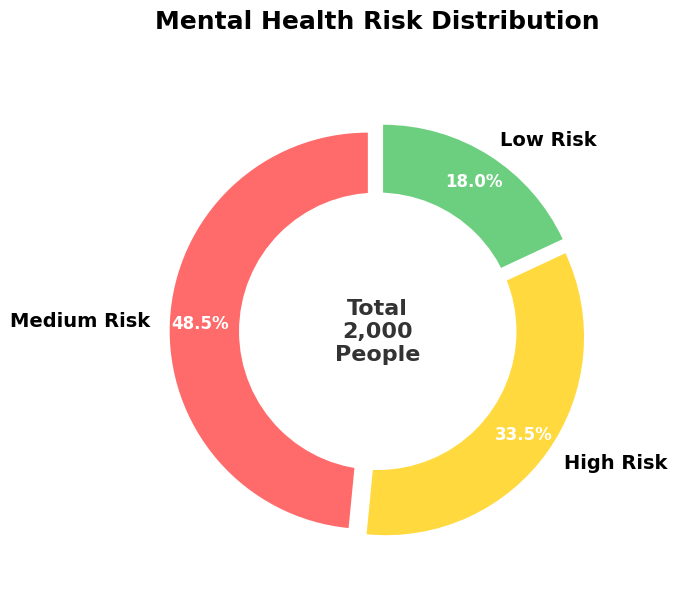

In [65]:
# 1. VISUALISASI DISTRIBUSI KATEGORI RISIKO (Donut Chart)
risk_counts = df['risk_category'].value_counts()
colors = ['#FF6B6B', '#FFD93D', '#6BCF7F']  # Red, Yellow, Green

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(risk_counts.values,
                                  labels=risk_counts.index,
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=90,
                                  pctdistance=0.85,
                                  explode=(0.05, 0.05, 0.05))

# Buat donut chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Tambahkan jumlah di tengah
ax.text(0, 0, f'Total\n{len(df):,}\nPeople',
        horizontalalignment='center', verticalalignment='center',
        fontsize=16, fontweight='bold', color='#333333')

# Styling
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

plt.title('Mental Health Risk Distribution\n', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

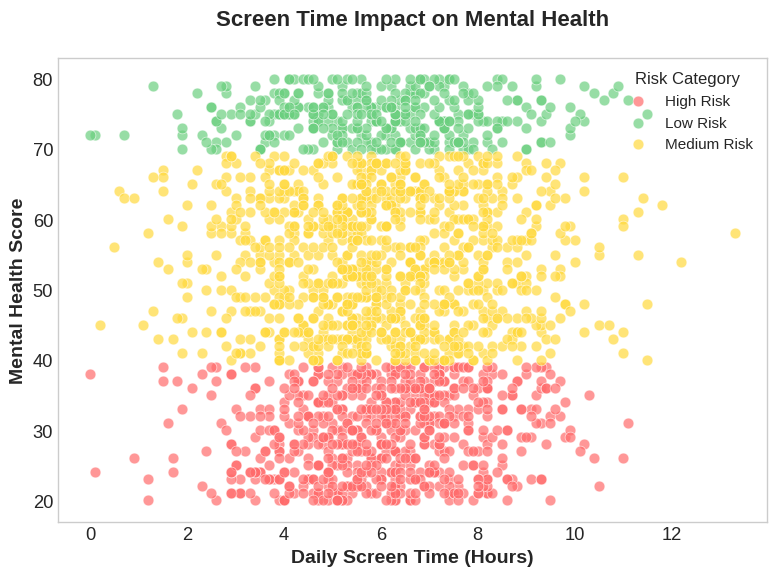

In [108]:
# 2. SCREEN TIME VS MENTAL HEALTH SCORE (Scatter Plot)
plt.figure(figsize=(8, 6))
colors_map = {'High Risk': '#FF6B6B', 'Medium Risk': '#FFD93D', 'Low Risk': '#6BCF7F'}

# Plot scatter untuk setiap kategori risiko
for risk in df['risk_category'].unique():
    subset = df[df['risk_category'] == risk]
    plt.scatter(subset['daily_screen_time_hours'],
               subset['mental_health_score'],
               c=colors_map[risk],
               label=risk,
               alpha=0.7,
               s=60,
               edgecolors='white',
               linewidth=0.5)

# Pengaturan label dan judul
plt.xlabel('Daily Screen Time (Hours)', fontsize=14, fontweight='bold')
plt.ylabel('Mental Health Score', fontsize=14, fontweight='bold')
plt.title('Screen Time Impact on Mental Health\n', fontsize=16, fontweight='bold')
plt.legend(title='Risk Category', title_fontsize=12, fontsize=11, loc='upper right')
plt.grid(False)  # Hapus grid lines
plt.tight_layout()
plt.show()

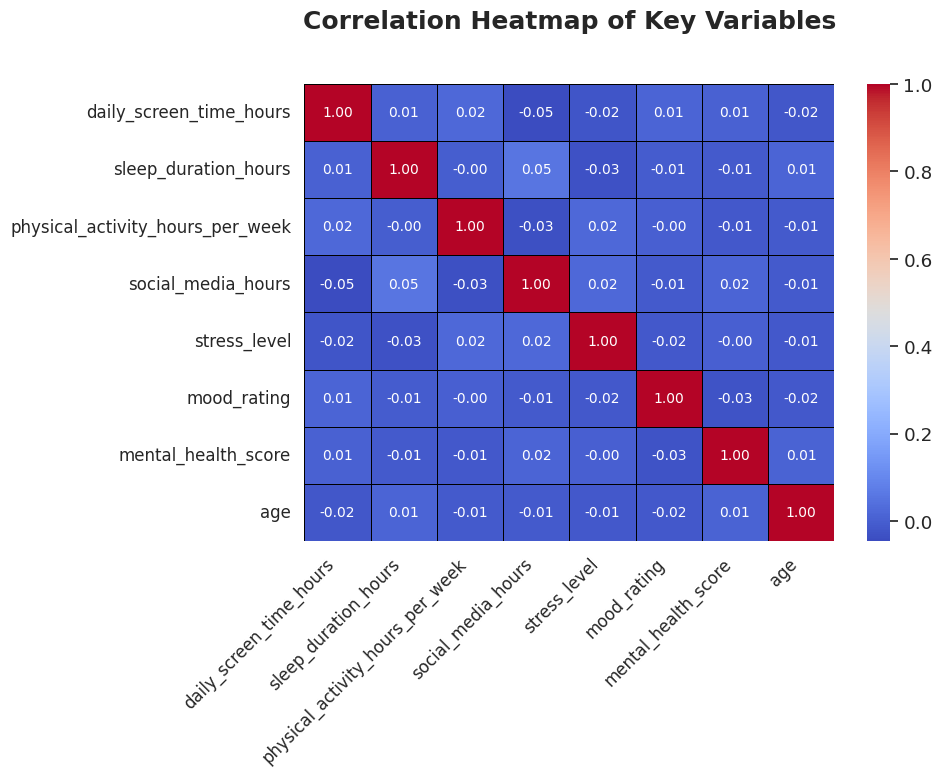

In [88]:
# 3. Heatmap Korelasi Antar Variabel

# Pilih kolom numerik yang relevan
numerical_cols = ['daily_screen_time_hours', 'sleep_duration_hours',
                  'physical_activity_hours_per_week', 'social_media_hours',
                  'stress_level', 'mood_rating', 'mental_health_score', 'age']

# Hitung matriks korelasi
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm', # Gunakan colormap yang menarik (contoh: 'coolwarm', 'viridis', 'plasma')
            fmt=".2f",      # Format angka menjadi 2 desimal
            linewidths=.5,   # Ketebalan garis antar sel
            linecolor='black', # Warna garis antar sel
            annot_kws={"size": 10}) # Ukuran font anotasi

plt.title('Correlation Heatmap of Key Variables\n', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

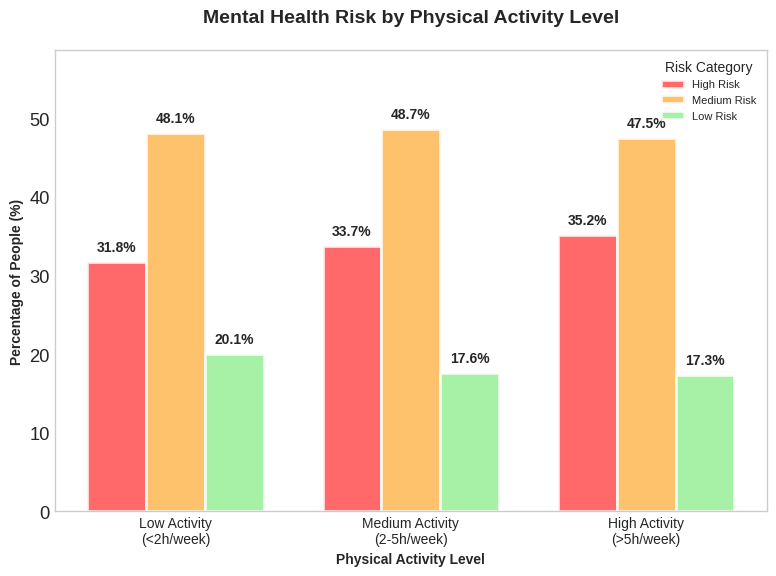

In [139]:
# 4. PERBANDINGAN AKTIVITAS FISIK (Grouped Bar Chart)
# Buat kategori aktivitas fisik
df['activity_level'] = pd.cut(df['physical_activity_hours_per_week'],
                             bins=[0, 2, 5, 20],
                             labels=['Low Activity\n(<2h/week)', 'Medium Activity\n(2-5h/week)', 'High Activity\n(>5h/week)'])

# Hitung persentase untuk setiap kategori
activity_risk = pd.crosstab(df['activity_level'], df['risk_category'], normalize='index') * 100

# Buat grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.25
x = np.arange(len(activity_risk.index))

# Warna untuk setiap risk category
colors = ['#FF4444', '#FFB347', '#90EE90']  # Red, Orange, Green
risk_categories = ['High Risk', 'Medium Risk', 'Low Risk']

# Plot setiap risk category
for i, (risk, color) in enumerate(zip(risk_categories, colors)):
    values = activity_risk[risk].values
    bars = ax.bar(x + i * bar_width, values, bar_width,
                  label=risk, color=color, alpha=0.8,
                  edgecolor='white', linewidth=2)

    # Tambahkan label persentase di atas bar
    for j, (bar, value) in enumerate(zip(bars, values)):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{value:.1f}%', ha='center', va='bottom',
                fontweight='bold', fontsize=10)

# Pengaturan styling
ax.set_xlabel('Physical Activity Level', fontsize=10, fontweight='bold')
ax.set_ylabel('Percentage of People (%)', fontsize=10, fontweight='bold')
ax.set_title('Mental Health Risk by Physical Activity Level\n', fontsize=14, fontweight='bold')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(activity_risk.index, fontsize=10)
ax.legend(title='Risk Category', title_fontsize=10, fontsize=8, loc='upper right')
ax.grid(False)  # Hapus grid lines
ax.set_ylim(0, max(activity_risk.values.flatten()) + 10)
plt.tight_layout()
plt.show()

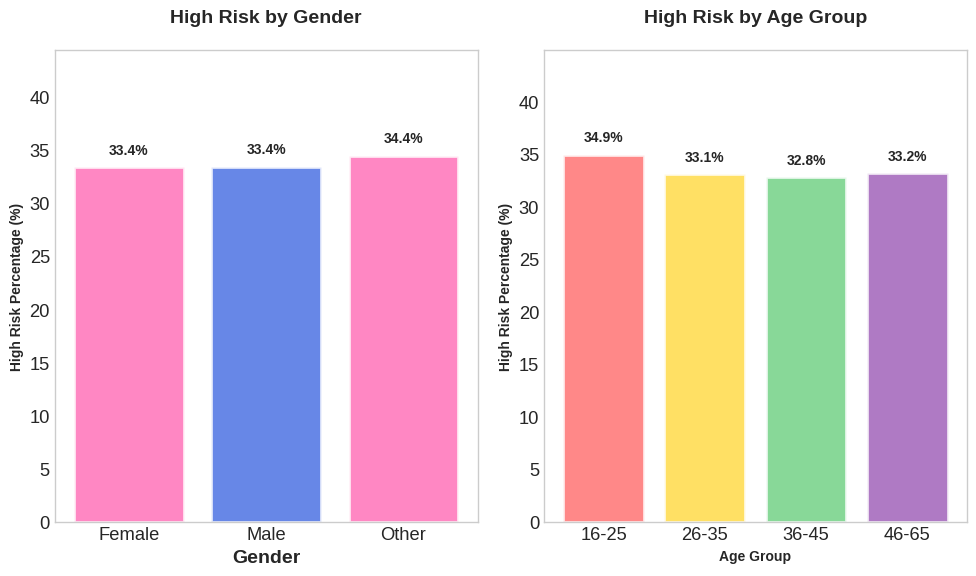

In [136]:
# 6. VISUALISASI GENDER & AGE IMPACT

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Gender Analysis
gender_risk = df.groupby('gender')['risk_category'].apply(lambda x: (x == 'High Risk').mean() * 100)
bars1 = ax1.bar(gender_risk.index, gender_risk.values,
                color=['#FF69B4', '#4169E1'], alpha=0.8, linewidth=2)

# Tambahkan persentase di atas bar
for bar, value in zip(bars1, gender_risk.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.1f}%', ha='center', va='bottom',
             fontweight='bold', fontsize=10)

ax1.set_title('High Risk by Gender', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Gender', fontsize=14, fontweight='bold')
ax1.set_ylabel('High Risk Percentage (%)', fontsize=10, fontweight='bold')
ax1.set_ylim(0, max(gender_risk.values) + 10)
ax1.grid(False)

# Age Analysis
df['age_group'] = pd.cut(df['age'], bins=[15, 25, 35, 45, 65],
                        labels=['16-25', '26-35', '36-45', '46-65'])
age_risk = df.groupby('age_group')['risk_category'].apply(lambda x: (x == 'High Risk').mean() * 100)

bars2 = ax2.bar(age_risk.index, age_risk.values,
                color=['#FF6B6B', '#FFD93D', '#6BCF7F', '#9B59B6'],
                alpha=0.8, linewidth=2)

# Tambahkan persentase di atas bar
for bar, value in zip(bars2, age_risk.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.1f}%', ha='center', va='bottom',
             fontweight='bold', fontsize=10)

ax2.set_title('High Risk by Age Group', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Age Group', fontsize=10, fontweight='bold')
ax2.set_ylabel('High Risk Percentage (%)', fontsize=10, fontweight='bold')
ax2.set_ylim(0, max(age_risk.values) + 10)
ax2.grid(False)

plt.tight_layout()
plt.show()